In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
files = {
    "Baseline": './Data/results/Baseline_forecast_results.csv',
    "VAR": './Data/results/var_forecast_results.csv',
    "BVAR" : './Data/results/BVAR_forecast_results.csv',
    "GB": './Data/results/GB_forecast_results.csv',
    "LSTM": './Data/results/lstm_forecast_results.csv',
    "BNN": './Data/results/bnn_forecast_results.csv',
    "Random Forest": './Data/results/rf_forecast_results.csv',
    "FF_NN": './Data/results/FF_NN_forecast_results.csv'
}

# Container for all model results
all_results = []

for model_name, file_path in files.items():
    df = pd.read_csv(file_path)

    # Calculate residuals
    df["residual"] = df["y_pred"] - df["y_true"]

    # Add model name
    df["model"] = model_name

    # Keep only relevant columns
    df = df[["date", "model", "y_true", "y_pred", "residual"]]

    all_results.append(df)

# Combine all into one DataFrame
combined_results = pd.concat(all_results, ignore_index=True)

# Optional: convert date to datetime format
combined_results["date"] = pd.to_datetime(combined_results["date"])


In [3]:
## Wichtge Wirtschaftskrisen 
krisen = [("2001-03-01", "2001-11-01"),  # Dotcom-Blase
        ("2007-12-01", "2009-06-01"),  # Finanzkrise
        ("2020-02-01", "2021-12-01")   # COVID-19-Pandemie
        ]

# Datumskonvertierung
krisen = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in krisen]

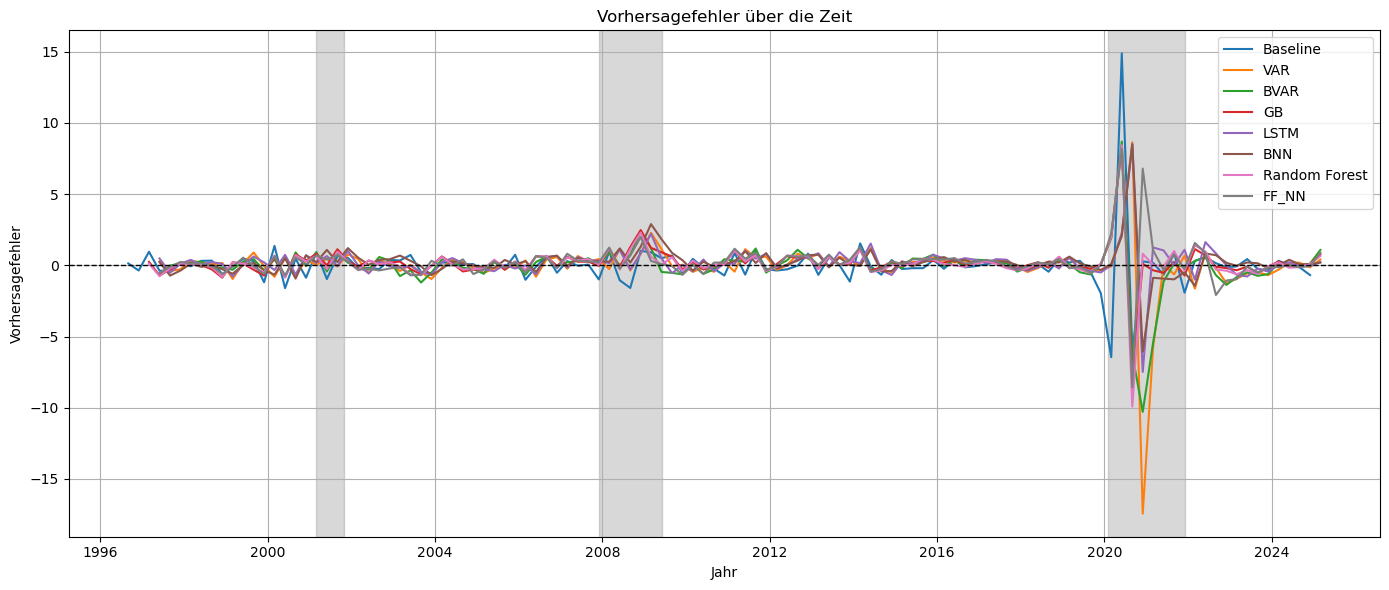

In [4]:
plt.figure(figsize=(14, 6))

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    plt.plot(model_data["date"], model_data["residual"], label=model)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Vorhersagefehler über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Vorhersagefehler")
plt.legend()
# Graue Schattierung für Krisenzeiträume
ax = plt.gca()
for start, end in krisen:
    ax.axvspan(start, end, color='gray', alpha=0.3)
    
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/residuals_over_time_smallData.png")
plt.show()

In [5]:
rmse_list = []

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    rmse = np.sqrt(np.mean(model_data["residual"] ** 2))
    rmse_list.append({"model": model, "rmse": rmse})

# DataFrame erstellen und nach RMSE sortieren
rmse_df = pd.DataFrame(rmse_list).sort_values(by="rmse")
print(rmse_df.round(4))

           model    rmse
5            BNN  1.1641
3             GB  1.1978
4           LSTM  1.2294
6  Random Forest  1.3428
7          FF_NN  1.4238
2           BVAR  1.6038
0       Baseline  1.7403
1            VAR  2.0083


In [6]:
# RMSE ohne Krisenperioden berechnen

def ist_krisenzeitpunkt(datum):
    return any(start <= datum <= end for start, end in krisen)

rmse_list = []

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    
    # Datum als datetime konvertieren, falls noch nicht geschehen
    model_data = model_data.copy()
    model_data["date"] = pd.to_datetime(model_data["date"])

    # Zeilen entfernen, die in eine Krisenperiode fallen
    model_data = model_data[~model_data["date"].apply(ist_krisenzeitpunkt)]

    # RMSE berechnen
    rmse = np.sqrt(np.mean(model_data["residual"] ** 2))
    rmse_list.append({"model": model, "rmse": rmse})

# DataFrame erstellen und sortieren
rmse_oK_df = pd.DataFrame(rmse_list).sort_values(by="rmse")
print(rmse_oK_df.round(4))

           model    rmse
3             GB  0.4205
6  Random Forest  0.4445
5            BNN  0.4572
2           BVAR  0.4938
4           LSTM  0.5070
1            VAR  0.5116
7          FF_NN  0.5345
0       Baseline  0.5635


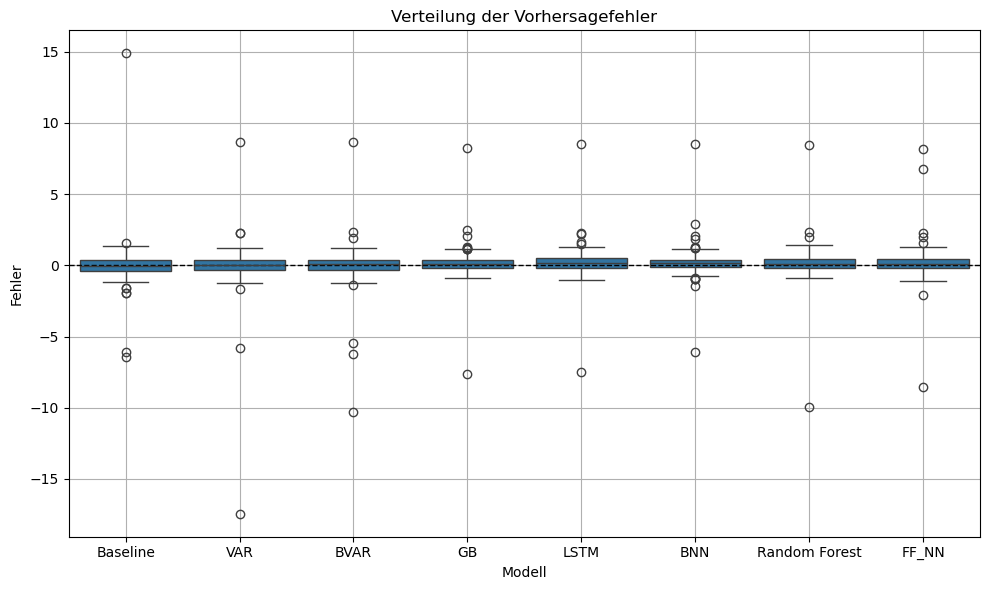

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_results, x="model", y="residual")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Verteilung der Vorhersagefehler")
plt.ylabel("Fehler")
plt.xlabel("Modell")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/residuals_boxplot_smallData.png")
plt.show()

### Zweite Prognose mit mehr Prädiktoren auswerten 

In [8]:
files = {
    "Baseline": './Data/results/Baseline_forecast_results.csv',
    "VAR": './Data/results/var_forecast_2_results.csv',
    "BVAR" : './Data/results/BVAR_forecast_2_results.csv',
    "GB": './Data/results/GB_forecast_2_results.csv',
    "LSTM": './Data/results/lstm_forecast_2_results.csv',
    "BNN": './Data/results/bnn_forecast_2_results.csv',
    "Random Forest": './Data/results/rf_forecast_2_results.csv',
    "FF_NN": './Data/results/FF_NN_forecast_2_results.csv'
}

# Container for all model results
all_results = []

for model_name, file_path in files.items():
    df = pd.read_csv(file_path)

    # Calculate residuals
    df["residual"] = df["y_pred"] - df["y_true"]

    # Add model name
    df["model"] = model_name

    # Keep only relevant columns
    df = df[["date", "model", "y_true", "y_pred", "residual"]]

    all_results.append(df)

# Combine all into one DataFrame
combined_results = pd.concat(all_results, ignore_index=True)

# Optional: convert date to datetime format
combined_results["date"] = pd.to_datetime(combined_results["date"])


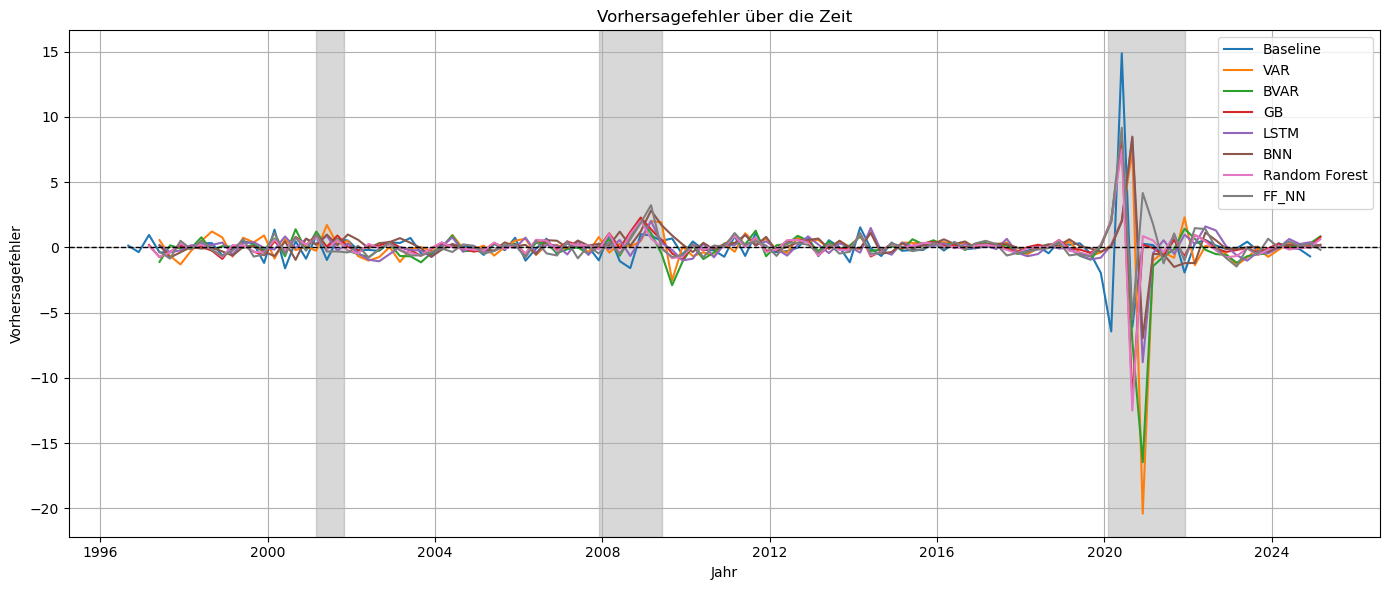

In [9]:
plt.figure(figsize=(14, 6))

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    plt.plot(model_data["date"], model_data["residual"], label=model)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Vorhersagefehler über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Vorhersagefehler")
plt.legend()
# Graue Schattierung für Krisenzeiträume
ax = plt.gca()
for start, end in krisen:
    ax.axvspan(start, end, color='gray', alpha=0.3)
    
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/residuals_over_time_BIGData.png")
plt.show()

In [10]:
rmse_list = []

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    rmse = np.sqrt(np.mean(model_data["residual"] ** 2))
    rmse_list.append({"model": model, "rmse": rmse})

# DataFrame erstellen und nach RMSE sortieren
rmse_df = pd.DataFrame(rmse_list).sort_values(by="rmse")
print(rmse_df.round(4))

           model    rmse
5            BNN  1.2037
7          FF_NN  1.2892
4           LSTM  1.2893
3             GB  1.4277
6  Random Forest  1.4689
0       Baseline  1.7403
2           BVAR  1.9939
1            VAR  2.1764


In [11]:
# RMSE ohne Krisenperioden berechnen

def ist_krisenzeitpunkt(datum):
    return any(start <= datum <= end for start, end in krisen)

rmse_list = []

for model in combined_results["model"].unique():
    model_data = combined_results[combined_results["model"] == model]
    
    # Datum als datetime konvertieren, falls noch nicht geschehen
    model_data = model_data.copy()
    model_data["date"] = pd.to_datetime(model_data["date"])

    # Zeilen entfernen, die in eine Krisenperiode fallen
    model_data = model_data[~model_data["date"].apply(ist_krisenzeitpunkt)]

    # RMSE berechnen
    rmse = np.sqrt(np.mean(model_data["residual"] ** 2))
    rmse_list.append({"model": model, "rmse": rmse})

# DataFrame erstellen und sortieren
rmse_oK_df = pd.DataFrame(rmse_list).sort_values(by="rmse")
print(rmse_oK_df.round(4))

           model    rmse
3             GB  0.3886
6  Random Forest  0.4036
5            BNN  0.4431
4           LSTM  0.5273
7          FF_NN  0.5365
0       Baseline  0.5635
2           BVAR  0.5946
1            VAR  0.6088


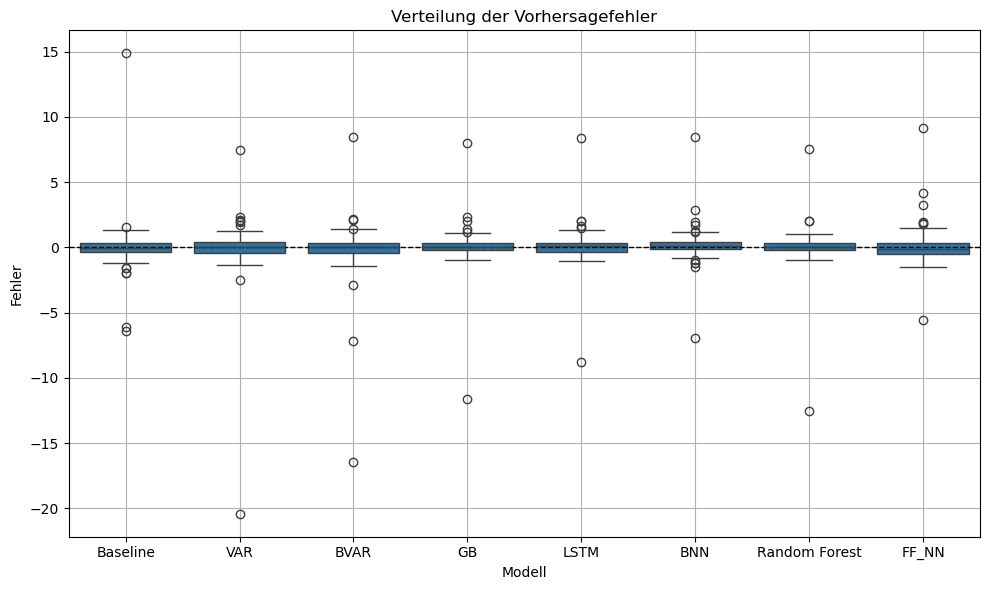

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_results, x="model", y="residual")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Verteilung der Vorhersagefehler")
plt.ylabel("Fehler")
plt.xlabel("Modell")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/residuals_boxplot_BIGData.png")
plt.show()